# Perform EDA on below insurance dataset

Link: https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

Perform All steps of EDA and document conclusions and then perform feature engineering.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"..\Datasets\insurance_data.csv")

In [3]:
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


## Univariate analysis

### Age 

- Age seems to be fairly normally distributed and skewness is relatively low.
- There don't seem to be any outliers
- Only 0.37% values seem to be null
- The null values should be replaced with appropriate values based on other parameters like bloodpressure?

<Axes: ylabel='Density'>

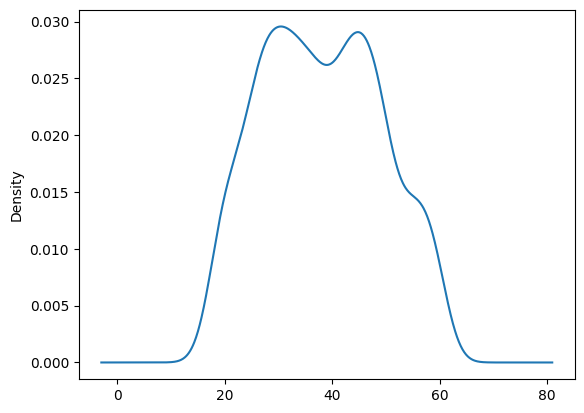

In [4]:
# kde plot to gauge the distribution of age

df['age'].plot(kind='kde')

<Axes: ylabel='Frequency'>

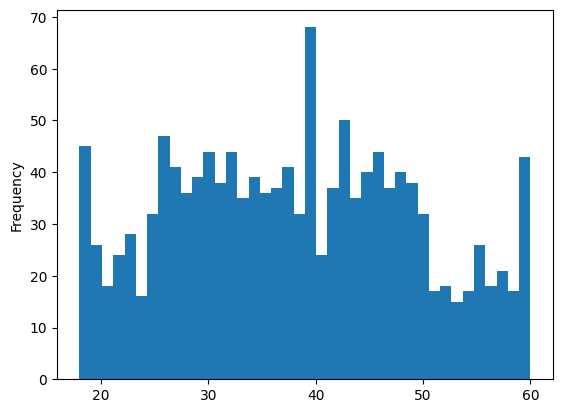

In [5]:
# Histogram of age column

df['age'].plot(kind='hist', bins=40)

In [6]:
# skewness of age 

df.age.skew()

0.11361133741072633

<Axes: >

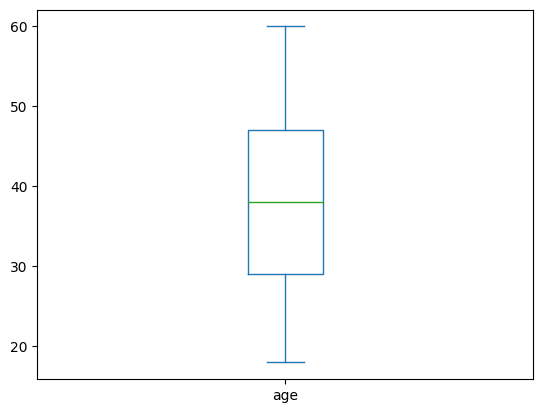

In [7]:
# checking outliers

df.age.plot(kind='box')

In [8]:
df.age.describe()

count    1335.000000
mean       38.078652
std        11.102924
min        18.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        60.000000
Name: age, dtype: float64

In [9]:
# Percent of null values

(df.age.isnull().sum() / df.age.size)*100

0.3731343283582089

### Gender

- The sex ratio is very close to 1 i.e. almost equal number of males and females have claimed insurance.
- There are no null values.

In [10]:
# sex ratio

df.gender.value_counts().iloc[0] / df.gender.value_counts().iloc[1]

1.0241691842900302

In [11]:
df.gender.isnull().sum()

0

### Blood pressure

- By observing the range, mean and IQR; we can conclude that this is diastolic B.P. in mmHg
- Assigning a separate column BPtype for category of BP
- More than 94% of the insurance claimants have Hypertension, which may indicate that some extremely high values of BP may be systolic BP. Need to affirm.
- There are no null values for this parameter.

<Axes: ylabel='Frequency'>

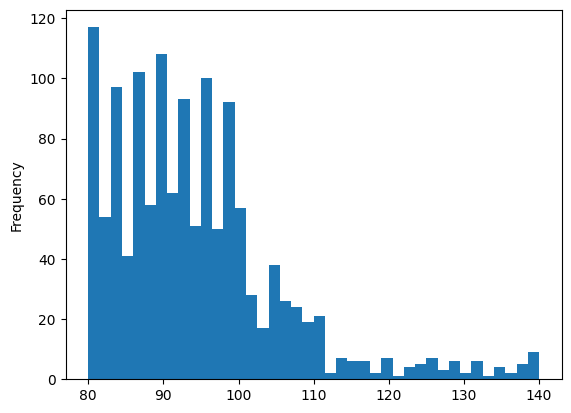

In [12]:
df.bloodpressure.plot(kind='hist', bins=40)

In [13]:
df.bloodpressure.describe()

count    1340.000000
mean       94.157463
std        11.434712
min        80.000000
25%        86.000000
50%        92.000000
75%        99.000000
max       140.000000
Name: bloodpressure, dtype: float64

<Axes: ylabel='Density'>

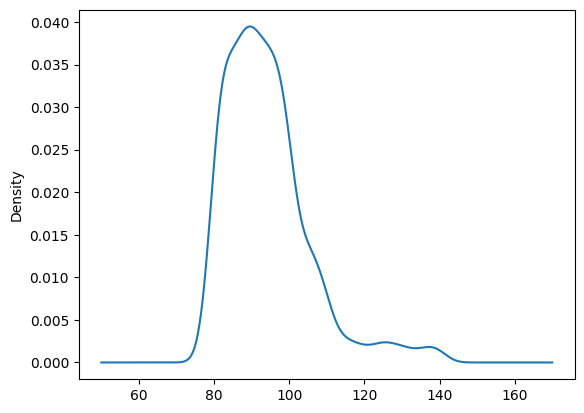

In [14]:
df.bloodpressure.plot(kind='kde')

<Axes: >

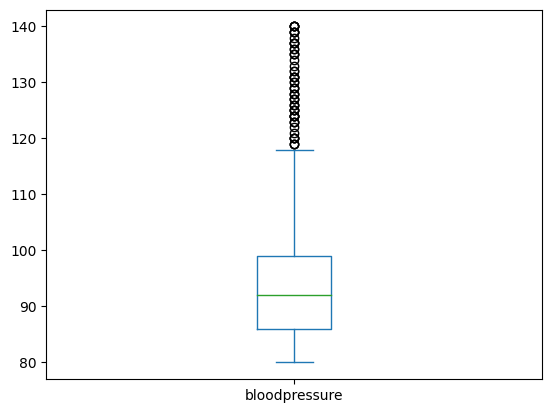

In [15]:
df.bloodpressure.plot(kind='box')

In [16]:
df.bloodpressure.skew()

1.4835342102293079

In [17]:
df[df.bloodpressure>118]

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1147,1147,1148,29.0,female,32.7,128,Yes,2,No,northwest,26018.95
1150,1150,1151,55.0,female,27.1,135,No,1,No,southwest,26140.36
1152,1152,1153,38.0,female,35.9,128,No,1,No,northeast,26392.26
1153,1153,1154,43.0,male,36.8,126,No,2,No,northwest,26467.10
1154,1154,1155,31.0,male,23.8,126,Yes,0,Yes,southeast,26926.51
...,...,...,...,...,...,...,...,...,...,...,...
1325,1325,1326,52.0,female,36.4,133,Yes,1,Yes,northeast,48517.56
1332,1332,1333,26.0,male,37.0,120,No,2,Yes,southeast,49577.66
1333,1333,1334,44.0,male,36.4,127,No,1,Yes,southwest,51194.56
1334,1334,1335,43.0,male,32.8,125,No,0,Yes,southwest,52590.83


In [18]:
def bptype(x):
    if x>120:
        return 'HypeCrisis'
    elif x>=90:
        return 'Hype2'
    elif x>80:
        return 'Hype1'
    else:
        return 'Normal'
    
    

df['BPtype'] = df.bloodpressure.apply(bptype)

In [25]:
(df.BPtype.value_counts() / df.BPtype.value_counts().sum())*100

Hype2         56.567164
Hype1         34.925373
Normal         4.402985
HypeCrisis     4.104478
Name: BPtype, dtype: float64

<Axes: >

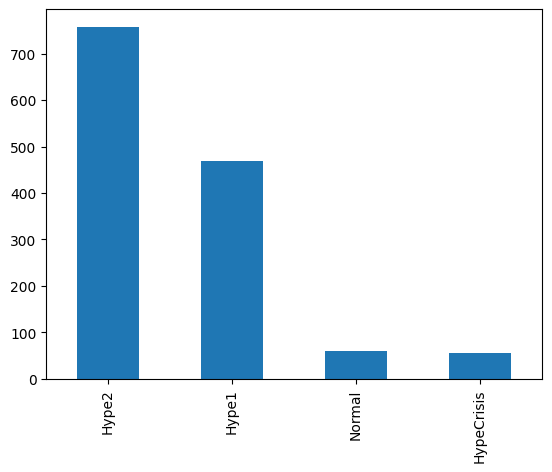

In [23]:
df.BPtype.value_counts().plot(kind='bar')

In [27]:
df.bloodpressure.isnull().sum()

0

### BMI (Body Mass Index)

- 

<Axes: ylabel='Frequency'>

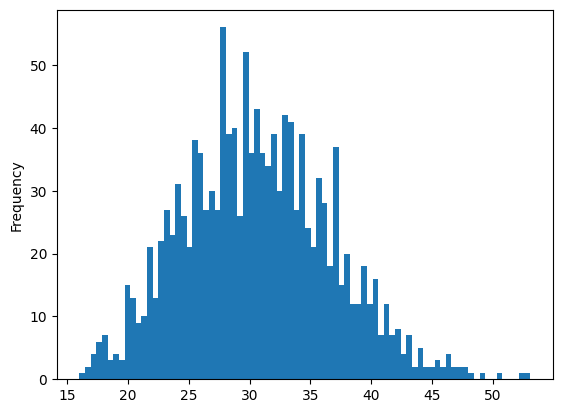

In [37]:
df.bmi.plot(kind='hist', bins=80)

<Axes: ylabel='Density'>

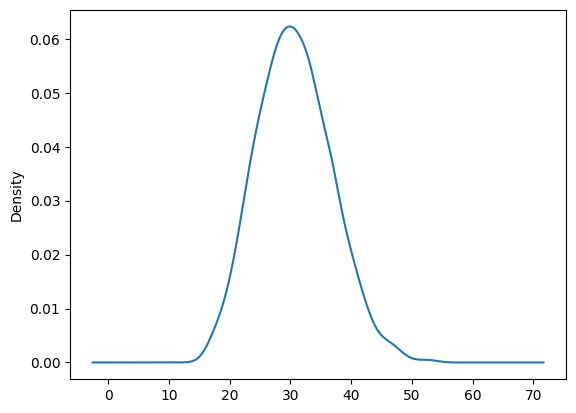

In [32]:
df.bmi.plot(kind='kde')

In [33]:
df.bmi.skew()

0.28597245020808587